In [20]:
from keras.datasets import mnist

In [21]:
dataset = mnist.load_data('mnist.db')

In [22]:
train, test = dataset

In [23]:
X_train, y_train = train
X_test, y_test = test

In [24]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [25]:
X_train.shape

(60000, 784)

In [26]:
from keras import Sequential
model = Sequential()

In [27]:
X_train.shape

(60000, 784)

In [28]:
from keras.layers import Dense
model.add(
    Dense(
        input_shape=(784,),
        units=512,
        activation='relu',
    )
)

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.add(
    Dense(
        units=256,
        activation='relu',
        kernel_initializer='he_normal'
    )
)
model.add(
    Dense(
        units=128,
        activation='relu',
        kernel_initializer='he_normal'
    )
)
model.add(
    Dense(
        units=64,
        activation='relu',
        kernel_initializer='he_normal'
    )
)
model.add(
    Dense(
        units=32,
        activation='relu',
        kernel_initializer='he_normal'
    )
)
model.add(
    Dense(
        units=10,
        activation='softmax',
        kernel_initializer='he_normal'
    )
)

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
________________________________________________

In [32]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [34]:
model.fit(X_train,y_train_cat,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7398 - accuracy: 0.7099
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 1.4091 - accuracy: 0.6634
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 2.0508 - accuracy: 0.3325
Epoch 4/50
1875/1875 [==============================] - 10s 6ms/step - loss: 2.0954 - accuracy: 0.2750
Epoch 5/50
1875/1875 [==============================] - 10s 6ms/step - loss: 2.1896 - accuracy: 0.2868
Epoch 6/50
1875/1875 [==============================] - 12s 6ms/step - loss: 2.1468 - accuracy: 0.2456
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 2.1544 - accuracy: 0.2234
Epoch 8/50
1875/1875 [==============================] - 11s 6ms/step - loss: 2.1392 - accuracy: 0.2340
Epoch 9/50
1875/1875 [==============================] - 10s 5ms/step - loss: 2.2206 - accuracy: 0.2515
Epoch 10/50
1875/1875 [==============================] - 11s 6ms/step - l

In [35]:
import pandas as pd

In [36]:

loss = pd.DataFrame(model.history.history['loss'])
accuracy = pd.DataFrame(model.history.history['accuracy'])

<AxesSubplot:>

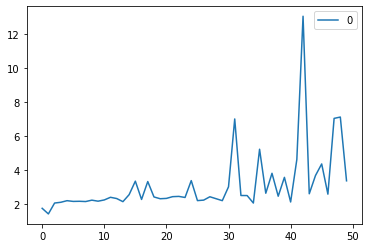

In [37]:
loss.plot()

<AxesSubplot:>

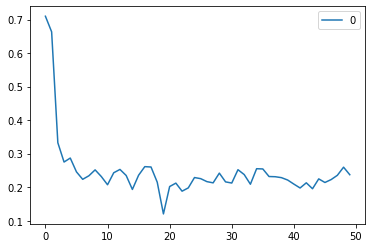

In [38]:
accuracy.plot()

In [39]:
X_test_1d = X_test.reshape(-1,28*28)

In [41]:
X_test_1d.shape

(10000, 784)

In [44]:
predicted_data = model.predict(X_test_1d)

In [45]:
predicted_data[1]

array([0.11564748, 0.03445999, 0.09738836, 0.07345742, 0.11198545,
       0.10510224, 0.11537687, 0.11965603, 0.11263787, 0.1142883 ],
      dtype=float32)

In [46]:
sum = 0
for i in predicted_data[1]:
    sum = sum + i